**Importing the libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import pandas as pd
#!pip install nltk
# plotting
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
# nltk
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
%matplotlib inline
!pip install clean-text
from cleantext import clean
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score,roc_auc_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.models import *
from keras.layers import *

In [ ]:
from google.colab import files
files=files.upload()

Saving Canadian_elections_2021.csv to Canadian_elections_2021 (1).csv
Saving sentiment_analysis.csv to sentiment_analysis (1).csv


In [ ]:
#Importing the datasets
elections_data=pd.read_csv('Canadian_elections_2021.csv')
sentiments_data=pd.read_csv('sentiment_analysis.csv')

#PART 1. DATA CLEANING:

-A function is designed here to remove all emojis, URLs, punctuations, stop words and ensure that all letters are in lowercase.

Clean text is human language rearranged into a format that machine models can understand.The goal of data preparation is to produce ‘clean text’ that machines can analyze error free.

In [ ]:
stop_words = set(stopwords.words('english'))
def data_cleaning(tweet):

  tweet=tweet.lower()

  #removing stopwords
  tweet_tokens = word_tokenize(tweet)
  filtered_words = [w for w in tweet_tokens if not w in stop_words]
  text= " ".join(filtered_words)

  #removing punctuations
  import string
  english_punctuations = string.punctuation
  punctuations_list = english_punctuations
  translator = str.maketrans('', '', punctuations_list)
  text= text.translate(translator)

  #removing URLs
  text= re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)

  #Remove the word 'rt'
  text = re.sub('rt ', '', text)

  #removing numeric characters
  text= re.sub('[0-9]+', '', text)

  #removing emojis
  text=clean(text, no_emoji=True)

  #Lemmetizing for performing better classification on the later part of the assignment
  lem=WordNetLemmatizer()
  words_lem = [lem.lemmatize(word) for word in word_tokenize(text)]
  words_lem = [word for word in words_lem if (len(word)>1)]
  text = (" ").join(words_lem)

  return str(text)

In [ ]:
#Get a copy of these dataframe for later part
df1=elections_data.copy(deep=True)
df2=sentiments_data.copy(deep=True)

In [ ]:
#Apply data cleaning to the elections data
df1['text']= df1['text'].apply(lambda x: data_cleaning(x))
df1.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes ta...,negative,calling election early
1,hope trudeau loses canadian election tomorrow ...,negative,covid
2,dear canadian election test progressive whethe...,positive,NaN
3,canadian friend never forget trudeau year mand...,negative,calling election early
4,sorry thejagmeetsingh voted ndp life election ...,positive,NaN


In [ ]:
#Apply data cleaning to the generic tweets
df2['text']= df2['text'].apply(lambda x: data_cleaning(x))
df2.head()

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeder crown...,1
1,7.680980e+17,mianusmanjaved congratulation pakistan becomin...,1
2,7.680980e+17,pepalerts september yesmag taking maine mendoz...,1
3,7.680980e+17,davidgaibis newly painted wall thanks million ...,1
4,7.680980e+17,cedricfeschotte excited announce july feschott...,1


#PART 2: EXPLORATORY DATA ANALYSIS

##2.1) 





### i) Designing a procedure that determines political party of a given tweet in elections data.

In order to determine keywords for identifying politicians and the political parties, we first look at the top hashtags and tagged people in the tweets:

In [ ]:
#Top 20 tweeted hashtags in the elections dataset
elections_data.text.str.extractall(r'(\#\w+)')[0].value_counts()[:20]

#Elxn44                   95
#cdnpoli                  79
#NeverVoteConservative    51
#VotePPC                  43
#VoteLiberal              38
#IStandWithTrudeau        22
#elxn44                   20
#OToole                   19
#PPC                      14
#elections2021            14
#VoteLiberalMajority      11
#ForwardForEveryone       10
#NeverVoteCPC             10
#Canada                    9
#canadaelection            9
#VotePPC2021               9
#LiberalMajority           7
#OTooleForPM               6
#LeadersDebate             6
#VoteTrudeauOut            6
Name: 0, dtype: int64

In [ ]:
#Top 20 tagged in the elections dataset
elections_data.text.str.extractall(r'(\@\w+)')[0].value_counts()[:20]

@JustinTrudeau      86
@erinotoole         69
@theJagmeetSingh    21
@CPC_HQ             13
@MaximeBernier      12
@liberal_party      12
@suzannealma         7
@CBCNews             6
@davidakin           6
@CTVNews             5
@peoplespca          5
@BarackObama         5
@acoyne              5
@MercedesGlobal      5
@DonMartinCTV        5
@krismeloche         5
@kinsellawarren      4
@glen_mcgregor       4
@globalnews          4
@sunlorrie           4
Name: 0, dtype: int64

The major politicians in the tweets are Justin Trudeau, Erinotoole, Jagmeet Singh and Maxime Bernier.

On the basis of the above keywords, we identify the 4 major parties:

In [ ]:
liberal = ['liberal','trudeau','justin','liberal_party','forward','cafreeland','mikemorris','suzanne','lpc','koeverden','alghabra']
conservative = ['conservative','erinotoole','andrew','scheer','cpc_hq','cpc','ford','candice']
ndp = ['ndp','jagmeet','singh','mclean','berniesanders','mcgrath','shawnalewk']
ppc = ['ppc','maxime','bernier','peoplespca']

The 4 lists above contain the keywords using which we'll assign parties to the tweets.

In [ ]:
df1['party'] = 'None'

df1.loc[df1['text'].str.contains('|'.join(liberal)),"party"]= "Liberal"
df1.loc[df1['text'].str.contains('|'.join(conservative)),"party"]= "Conservative"
df1.loc[df1['text'].str.contains('|'.join(ndp)),"party"]= "NDP"
df1.loc[df1['text'].str.contains('|'.join(ppc)),"party"]= "PPC"

There are some tweets which are mixed and mention more than one party, we'll group them as well.

In [ ]:
df1.loc[df1['text'].str.contains('|'.join(liberal)) & df1['text'].str.contains('|'.join(conservative)),"party"] = 'Mixed'#"Liberal+Conservative"
df1.loc[df1['text'].str.contains('|'.join(liberal)) & df1['text'].str.contains('|'.join(ndp)),"party"] = 'Mixed'#"Liberal+NDP"
df1.loc[df1['text'].str.contains('|'.join(liberal)) & df1['text'].str.contains('|'.join(ppc)),"party"] ='Mixed' #"Liberal+PPC"
df1.loc[df1['text'].str.contains('|'.join(conservative)) & df1['text'].str.contains('|'.join(ndp)),"party"] ='Mixed' #"Conservative+NDP"
df1.loc[df1['text'].str.contains('|'.join(conservative)) & df1['text'].str.contains('|'.join(ppc)),"party"] ='Mixed' #"Conservative+PPC"
df1.loc[df1['text'].str.contains('|'.join(ndp)) & df1['text'].str.contains('|'.join(ppc)),"party"] ='Mixed' #"NDP+PPC"

In [ ]:
#add the party column in the original elections df as well
elections_data['party']=df1['party']
elections_data['party'].value_counts()

Liberal         335
None            295
Mixed           188
Conservative    111
PPC              50
NDP              23
Name: party, dtype: int64

In total, we have maximum tweets for Liberal party, followed by Conservative party, PPC and the least are for NDP.

Creating a column for poiliticians in the elections data for analysing the political affiliations later:

In [ ]:
trudeau = ['trudeau','justin']
otoole=['otoole','erinotoole']
singh=['jagmeet','singh']
bernier=['maxime','bernier']

df1['politician'] = 'None'
df1.loc[df1['text'].str.contains('|'.join(trudeau)),"politician"]= "Trudeau"
df1.loc[df1['text'].str.contains('|'.join(otoole)),"politician"]= "Otoole"
df1.loc[df1['text'].str.contains('|'.join(singh)),"politician"]= "Singh"
df1.loc[df1['text'].str.contains('|'.join(bernier)),"politician"]= "Bernier"
elections_data['politician']=df1['politician']

### ii) Identifying relevant hashtags and tagged people in the tweets in different parties

We look at the top hashtags and mentions in the negative and positive sentiments of each of the 4 parties respectively. The function below takes in the party, and gives 4 graphs for it:

1) Top hashtags(#) in its negative tweets

2) Top hashtags(#) in its positive tweets

In [ ]:
def parties_analysis(party):
  fig,ax=plt.subplots(1,2,figsize=(13,4))
  hashtag_neg=pd.DataFrame(elections_data[(elections_data['party']==party)&(elections_data['sentiment']=='negative')].text.str.extractall(r'(\#\w+)')[0].value_counts()[:20])
  hashtag_pos=pd.DataFrame(elections_data[(elections_data['party']==party)&(elections_data['sentiment']=='positive')].text.str.extractall(r'(\#\w+)')[0].value_counts()[:20])
  ax[0].barh(hashtag_neg.index[::-1],hashtag_neg[0][::-1],color='#003E7A')
  ax[0].set_title('Negative sentiments hashtags')
  ax[1].barh(hashtag_pos.index[::-1],hashtag_pos[0][::-1],color='#003E7A')
  ax[1].set_title('Positive sentiments hashtags')

  plt.tight_layout()

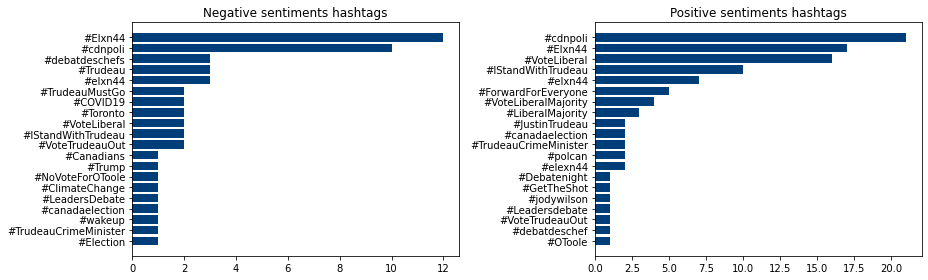

In [ ]:
parties_analysis('Liberal')

Key findings for liberal party:

-The top negative tweets target Trudeau saying that he must be voted out. They also include cliate change and covid-19 indicating the main reasons for public's disappointment.

-The top positive tweets say IStandWithTrudeau and ask for voting liberal party as majority.

-However, we can see negative hashtags like TrudeauCrimeMinister in positive sentiments and hashtags like VoteLiberal in negative sentiments which might make it difficult for correct classification.

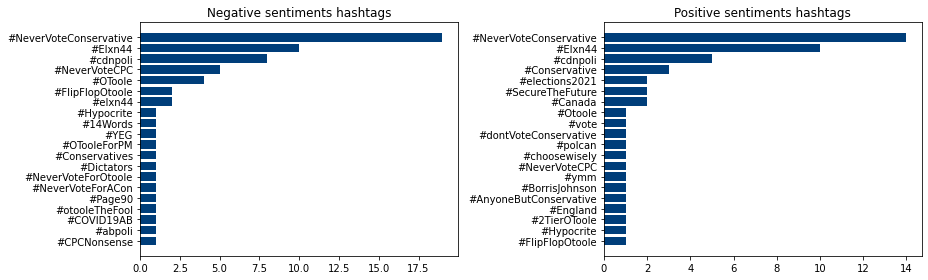

In [ ]:
parties_analysis('Conservative')

Key findings for Conservative:

-The top negative tweets target Otoole and ask to never vote Conservatives as they are hypocrites and dictators.

-The top positive tweets hashtags also talk negatively about Conservatives indicating that it will be very difficult to classify positive sentiments for conservative party.

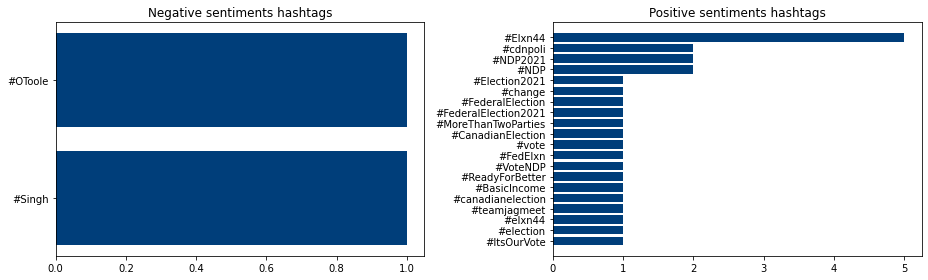

In [ ]:
parties_analysis('NDP')

Key findings for NDP: 

-All the tweets are mainly directed at Jagmeet Singh and the people feel that they may be capable of bringing about change.

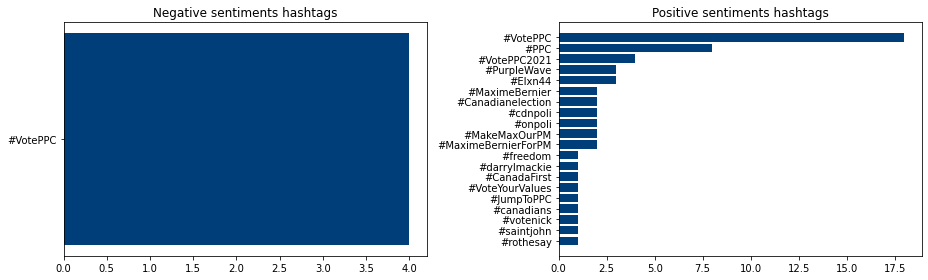

In [ ]:
parties_analysis('PPC')

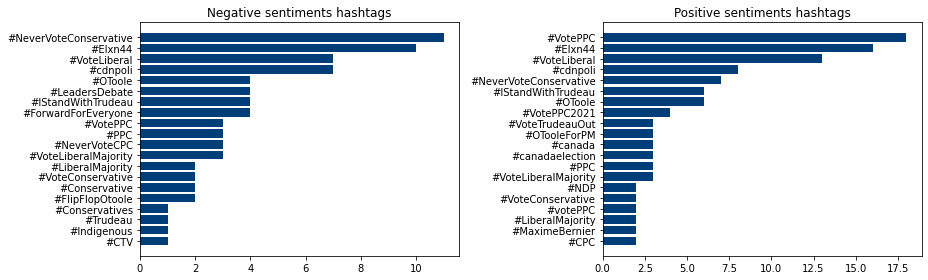

In [ ]:
parties_analysis('Mixed')

Key findings for Mixed tweets:

-The maximum negative mixed tweets are about conservative party and the maximum positive mixed tweets are about PPC.



###iii)Explaining about the distribution of the political affiliations of the tweets.

Liberal         335
None            295
Mixed           188
Conservative    111
PPC              50
NDP              23
Name: party, dtype: int64


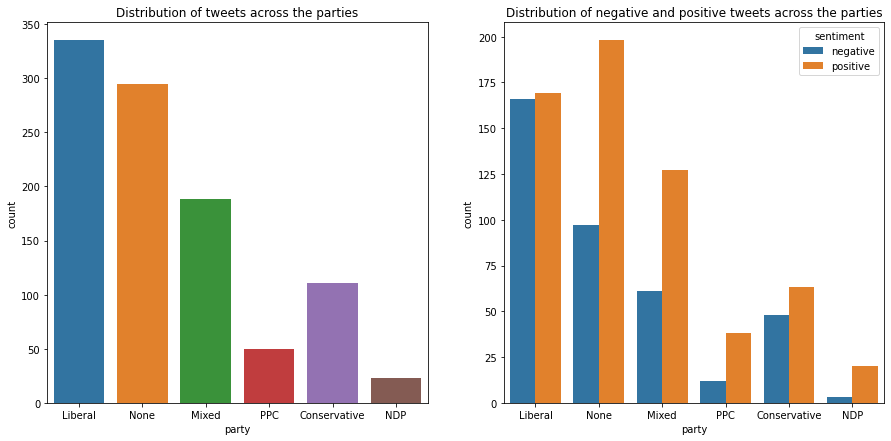

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,7))

#plot number of tweets in each party
ax1=sns.countplot(x='party', data=elections_data,ax=ax[0])
ax1.set_title('Distribution of tweets across the parties')
#plot the number of negative and positive tweets in each party
ax2=sns.countplot(x='party', data=elections_data,hue="sentiment",ax=ax[1])
ax2.set_title('Distribution of negative and positive tweets across the parties')
print(elections_data['party'].value_counts())

a) Most of the tweets are concerning Liberal party and the negative-positive ratio is 50-50. The second highest number of tweets do not have any political affiliation and are mostly positive.

b) Mixed tweets are third highest in number and are mostly positive meaning that people show positive or negative emotion for more than one party at a time.

c) Conservative party is another major party which has substantial tweets after Liberal party and has higher ratio of positive to negative tweets.

d) PPC and NDP are least popular parties with lower ratio of negative to positive tweets indicating they have more supporters than haters.

**Showing the distribution of positive and negative tweets across the 4 major politicians as a % of total number of tweets between them through pie plot:**

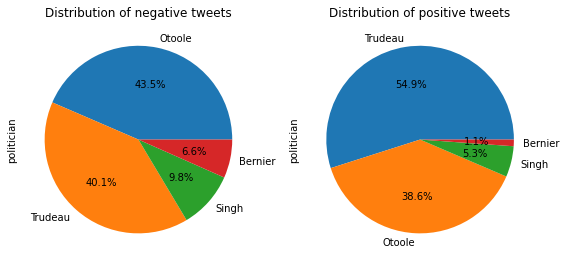

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(8,6))
def func(pct):
  return "{:1.1f}%".format(pct)
ax1=elections_data[elections_data['politician']!='None'][elections_data['sentiment']!='negative']['politician'].value_counts().plot.pie(autopct=lambda pct: func(pct),ax=ax[0])
ax1.set_title('Distribution of negative tweets')

ax2=elections_data[elections_data['politician']!='None'][elections_data['sentiment']!='positive']['politician'].value_counts().plot.pie(autopct=lambda pct: func(pct),ax=ax[1])
ax2.set_title('Distribution of positive tweets')
plt.tight_layout()
plt.show()

a) The maximum tweets are for Otoole and Trudeau, with Otools having maximum negative tweets(43.5%) of the total negative tweets for the 4 politician. Trudeau has maximum positive tweets(55%) of total.

b) The least number of negative and positive tweets are for Bernier from PPC.

##2.2)

###i) Presenting wordclouds and boxplot for the 2021 Canadian Elections tweets and discussing the findings.


Word clouds help understand what the audience feels about a topic/situation by summarising their view of the topic. In our case, it will help us deduce the key aspects of positive and negative sentiments of people towards elections.

Boxplot is a highly visually effective way of viewing a clear summary of one or more sets of data. We will use boxplot to plot the length of negative and positive tweets for each party.

In [ ]:
#df1 is the copy of elections data
#using tokenizer on df1 to make word cloud
tokenizer = RegexpTokenizer('\s+', gaps = True)
df1['tokenized text'] = df1['text'].apply(tokenizer.tokenize)
df1['tokenized text'].head()

0    [canadian, election, power, grab, pm, trudeau,...
1    [hope, trudeau, loses, canadian, election, tom...
2    [dear, canadian, election, test, progressive, ...
3    [canadian, friend, never, forget, trudeau, yea...
4    [sorry, thejagmeetsingh, voted, ndp, life, ele...
Name: tokenized text, dtype: object

(-0.5, 1599.5, 799.5, -0.5)

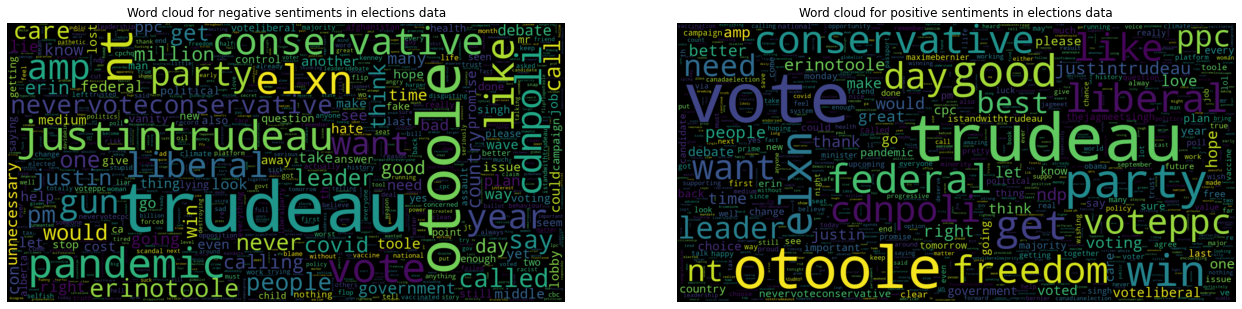

In [ ]:
#defining the negative words
data_neg = df1[df1['sentiment']=='negative']['tokenized text']

#remove some unnecessary words
remove_words = ["canadian","election","https",'canada','canadians','http']
new_list = []

#get the list of words
for words in data_neg:
    if words not in remove_words:
        new_list+= words

#plot the world cloud
wc = WordCloud(stopwords = remove_words,max_words = 1000 , width = 1600 , height = 800,max_font_size=200,collocations=False).generate(" ".join(new_list))
fig, axes = plt.subplots(1,2, figsize = (22,20))
axes[0].set_title('Word cloud for negative sentiments in elections data')
axes[0].imshow(wc, interpolation="bilinear")
axes[0].axis("off")

#defining the positive words
data_pos = df1[df1['sentiment']=='positive']['tokenized text']

#remove some unnecessary words
remove_words = ["canadian","election","https",'canada','canadians','http']
new_list = []

#get the list of words
for words in data_pos:
    if words not in remove_words:
        new_list+= words

#plot the world cloud
wc = WordCloud(stopwords = remove_words,max_words = 1000 , width = 1600 , height = 800,max_font_size=200,
               collocations=False).generate(" ".join(new_list))
axes[1].set_title('Word cloud for positive sentiments in elections data')
axes[1].imshow(wc, interpolation="bilinear")
axes[1].axis("off")

The word cloud above shows the main words in negative and positive election tweets.

Negative tweets: The tweets call out the two major politicians- Trudeau and Otoole, the two major parties- Liberal and conservative. The different negative tweets and hatred reasons seem to be pandemic, promises broken, gun violence, lies, controlling attitude, wanting many answers.

Positive tweets: Trudeau and Otoole are again majorly part of the positive tweets. Liberal, Conservative and PPC seem to have good representation in positive word cloud whereas NDP has very less. The main positive reasons are freedom, rights, better choice, good leadership, rightful and caring government. 

Text(0.5, 1.0, 'Word count of positive and negative tweets for each party in elections data')

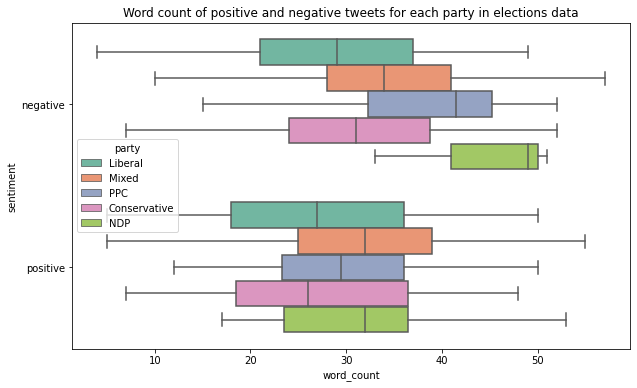

In [ ]:
#get the owrd count in each tweet in elections data
elections_data['word_count'] = elections_data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6))

#make a boxplot for the word count of each tweet for each party
sns.boxplot(x="word_count",y='sentiment', hue='party',data=elections_data[elections_data['party']!='None'], palette="Set2")
plt.title('Word count of positive and negative tweets for each party in elections data')

The boxplot above shows that on average, negative tweets are longer than positive tweets. This is expected because when people vent out their frustration, it is always lengthier. The longest tweets are negative tweets about NDP. PPC and NDP have much lengthier negative tweets than positive tweets. The mixed tweets generally have similar length of positive and negative tweets. The liberal and conservative parties have slightly lengthier negative tweets but the difference between positive and negative tweets is not too large.

###ii) Presenting wordclouds and boxplot for the generic sentiments tweets data and discussing the findings.


In [ ]:
#df2 is a copy of the generic tweets sentiments data and we will call it out here
#tokenzie the tweets to make word cloud
df2['tokenized text'] = df2['text'].apply(tokenizer.tokenize)
df2['tokenized text'].head()

0    [josh, jenkins, looking, forward, tab, breeder...
1    [mianusmanjaved, congratulation, pakistan, bec...
2    [pepalerts, september, yesmag, taking, maine, ...
3    [davidgaibis, newly, painted, wall, thanks, mi...
4    [cedricfeschotte, excited, announce, july, fes...
Name: tokenized text, dtype: object

(-0.5, 1599.5, 799.5, -0.5)

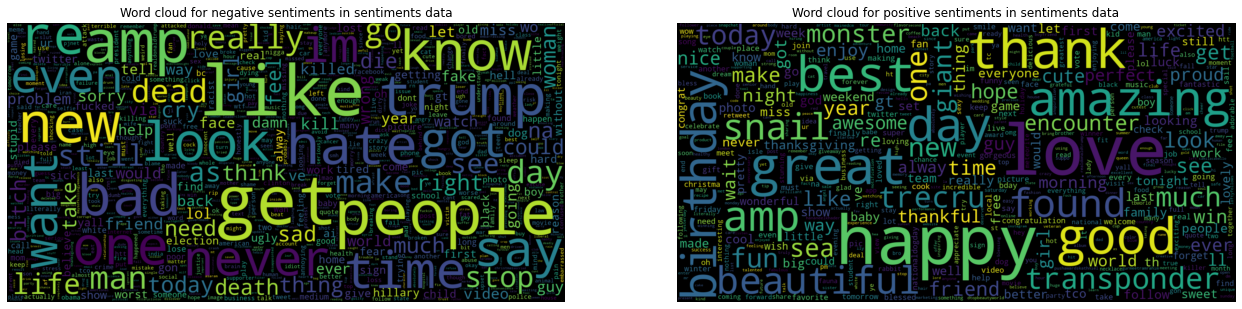

In [ ]:
#defining the negative words
data_neg = df2[df2['label']==0]['tokenized text']
#remove some unnecessary words
remove_words = ["fuck","fucking","nt","ca","shit",'http']

#get the list of words
new_list = []

for words in data_neg:
    if words not in remove_words:
        new_list+= words

#plot the world cloud
wc = WordCloud(stopwords = remove_words, max_words = 1000 , height = 800,width = 1600 ,max_font_size=200,collocations=False).generate(" ".join(new_list))
fig, axes = plt.subplots(1,2, figsize = (22,20))
axes[0].set_title('Word cloud for negative sentiments in sentiments data')
axes[0].imshow(wc, interpolation="bilinear")
axes[0].axis("off")

#defining the positive words
data_pos = df2[df2['label']==1]['tokenized text']
#remove some unnecessary words
remove_words = ["fuck","fucking","nt","ca","shit",'http']
new_list = []

#get the lsit of words
for words in data_pos:
    if words not in remove_words:
        new_list+= words

#plot the world cloud
wc = WordCloud(stopwords = remove_words,max_words = 500 ,width = 1600 , height = 800,max_font_size=200,collocations=False).generate(" ".join(new_list))
axes[1].set_title('Word cloud for positive sentiments in sentiments data')
axes[1].imshow(wc, interpolation="bilinear")
axes[1].axis("off")

The word cloud above shows the main words in negative and positive generic tweets.

Negative tweets: dead, bad, never, stop, hate, killed, bitch are some of the key words which would help model to learn negative data

Positive tweets: happy, best, thank, amazing, love, beautiful, birthday, thankful, awesome, nice, fun, like would help the model learn positive sentiments

Text(0.5, 1.0, 'Word count of positive and negative tweets in generic tweets data')

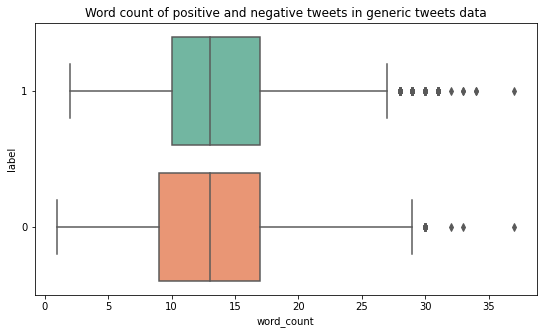

In [ ]:
sentiments_data['label']=sentiments_data['label'].map({0:'0',1:'1'})

#get the word count of each tweet in generic tweets data
sentiments_data['word_count'] = sentiments_data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(9,5))

#make a boxplot for the word count of each tweet for each party
sns.boxplot(x="word_count",y='label',data=sentiments_data, palette="Set2")
plt.title('Word count of positive and negative tweets in generic tweets data')

It is clear from the boxplot above that longer tweets are more common when sentiment is negative. Fewer positive tweets are longer than 25 words. This reinstates the fact that we saw larger tweets in elections data when the sentiment was negative.

#PART 3: CLASSIFICATION MODELS IMPLEMENTATION AND TUNING

##3.A) Fitting 7 ML classification models:

###i) Splitting the generic tweets into train(80%) and test(20%):

In [ ]:
#calling out cleaned sentiments(generic tweets) data:
df2.head()

,ID,text,label,tokenized text
0,7.680980e+17,josh jenkins looking forward tab breeder crown...,1,"[josh, jenkins, looking, forward, tab, breeder..."
1,7.680980e+17,mianusmanjaved congratulation pakistan becomin...,1,"[mianusmanjaved, congratulation, pakistan, bec..."
2,7.680980e+17,pepalerts september yesmag taking maine mendoz...,1,"[pepalerts, september, yesmag, taking, maine, ..."
3,7.680980e+17,davidgaibis newly painted wall thanks million ...,1,"[davidgaibis, newly, painted, wall, thanks, mi..."
4,7.680980e+17,cedricfeschotte excited announce july feschott...,1,"[cedricfeschotte, excited, announce, july, fes..."


In [ ]:
X=df2.text
y=df2.label

# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =1)

###ii) Preparing the data using TF-IDF and setting max_features to 5000.

In [ ]:
#initialising the TF-1DF vectorizer
vectoriser = TfidfVectorizer(max_features=5000)

#fitting the vectorizer on train
X_train_tfidf=vectoriser.fit_transform(X_train)

#transforming test using vectorizer
X_test_tfidf  = vectoriser.transform(X_test)

###iii) Fitting the data on 7 ML classification models and evaluating model performance

**Defining a function below that evaluates model performance by plotting confusion matrix:**

In [ ]:
def model_Evaluate(model,X_test_tfidf,y_test):
  # Predict values for Test dataset
  y_pred = model.predict(X_test_tfidf)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  plt.figure(figsize=(6,6))
  cf = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten() / np.sum(cf)]

  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf, annot = labels,cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
  
  plt.xlabel("Predicted values")
  plt.ylabel("Actual values" )
  plt.title ("Confusion Matrix")

####1) Logistic regression model

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     35810
           1       0.98      0.98      0.98     74269

    accuracy                           0.97    110079
   macro avg       0.96      0.96      0.96    110079
weighted avg       0.97      0.97      0.97    110079



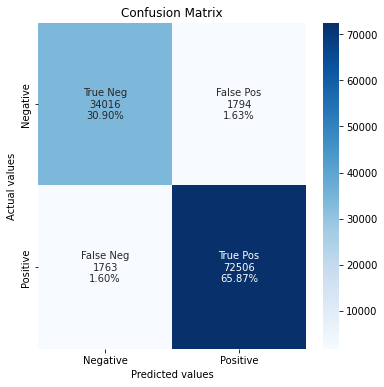

In [ ]:
#define the model
logistic_model=LogisticRegression(C=5,solver='saga')

#fit the model on train
logistic_model.fit(X_train_tfidf,y_train)

#evaluate the model on test
model_Evaluate(logistic_model,X_test_tfidf,y_test)

From the CM, we can see that False negative and False positive rates are very low at aroung 1.6%

In [ ]:
#prediction on test
test_pred_log=logistic_model.predict(X_test_tfidf)

#prediction probability on test
test_prob_log=logistic_model.predict_proba(X_test_tfidf)

#prediction on train
train_pred_log=logistic_model.predict(X_train_tfidf)

#printing the metrics
print('For best Logistic model','\nThe test accuracy:',accuracy_score(y_test,test_pred_log),'\ntrain accuracy:',accuracy_score(y_train,train_pred_log),'\nprecision score:',precision_score(y_test,test_pred_log),'\nrecall score:',recall_score(y_test,test_pred_log),'\nf1 score:',f1_score(y_test,test_pred_log))
print('AUC score is',roc_auc_score(y_test,test_prob_log[:,1]))

For best Logistic model 
The test accuracy: 0.9676868430854205 
train accuracy: 0.9705277167099693 
precision score: 0.9758546433378197 
recall score: 0.9762619666348005 
f1 score: 0.9760582624908292
AUC score is 0.9936819541351244


**The logistic model gives an accuracy of 96.8% on test data.**

####2) KNN Model

**Pls note: the below code takes 3 hours to run.**

In [ ]:
#defining the knn model
knn = KNeighborsClassifier(n_neighbors=5)

#fitting the model on train
knn.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [ ]:
#test prediction
test_pred_knn=knn.predict(X_test_tfidf)

#train prediction
train_pred_knn=knn.predict(X_train_tfidf)

#printing metrics
print('For best knn model','\nThe test accuracy:',accuracy_score(y_test,test_pred_knn),'\ntrain accuracy:',accuracy_score(y_train,train_pred_knn),'\nprecision score:',precision_score(y_test,test_pred_knn),'\nrecall score:',recall_score(y_test,test_pred_knn),'\nf1 score:',f1_score(y_test,test_pred_knn))

For best knn model 
The test accuracy: 0.814124401566148 
train accuracy: 0.8748750885735569 
precision score: 0.9188827302734011 
recall score: 0.7946518735946357 
f1 score: 0.8522639479555514


**The knn model gives an accuracy of 81.4% on test data which is significantly lower than other models.**

####3) Naive bayes model

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     35810
           1       0.98      0.97      0.98     74269

    accuracy                           0.97    110079
   macro avg       0.96      0.96      0.96    110079
weighted avg       0.97      0.97      0.97    110079



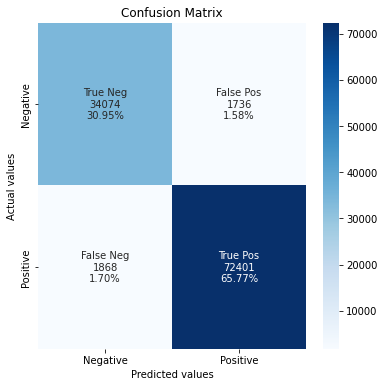

In [ ]:
#defining the mutlinomial naive bayes model
naive_model=MultinomialNB(alpha=1)

#fitting the model on train data
naive_model.fit(X_train_tfidf,y_train)

#evaluating the model on test data
model_Evaluate(naive_model,X_test_tfidf,y_test)

In [ ]:
#test prediction
test_pred_naive=naive_model.predict(X_test_tfidf)

#train prediction
train_pred_naive=naive_model.predict(X_train_tfidf)

#printing metrics
print('For best Naive bayes model','\nThe test accuracy:',accuracy_score(y_test,test_pred_naive),'\ntrain accuracy:',accuracy_score(y_train,train_pred_naive),'\nprecision score:',precision_score(y_test,test_pred_naive),'\nrecall score:',recall_score(y_test,test_pred_naive),'\nf1 score:',f1_score(y_test,test_pred_naive))

For best Naive bayes model 
The test accuracy: 0.9311131096757783 
train accuracy: 0.9326613855629644 
precision score: 0.9259017984876354 
recall score: 0.9760061398430031 
f1 score: 0.9502939884764383


**The Naive bayes model gives an accuracy of 93.1% on test data.**

####4) SVM model

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     35810
           1       0.98      0.98      0.98     74269

    accuracy                           0.97    110079
   macro avg       0.96      0.96      0.96    110079
weighted avg       0.97      0.97      0.97    110079



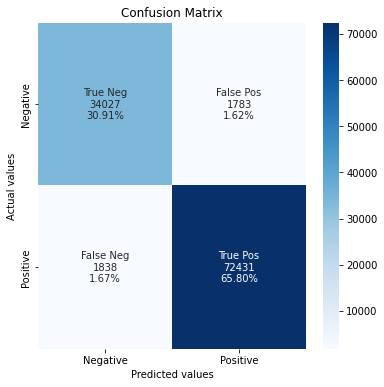

In [ ]:
#defining the linearSVC model
svm = LinearSVC(tol=1e-2,max_iter=20000,penalty='l2',random_state=1)

#fitting the model
svm.fit(X_train_tfidf,y_train)

#evaluating on test data
model_Evaluate(svm,X_test_tfidf,y_test)

In [ ]:
#test prediction
test_pred_svm=svm.predict(X_test_tfidf)

#train prediction
train_pred_svm=svm.predict(X_train_tfidf)

#printing metrics
print('For best SVM model','\nThe test accuracy:',accuracy_score(y_test,test_pred_svm),'\ntrain accuracy:',accuracy_score(y_train,train_pred_svm),'\nprecision score:',precision_score(y_test,test_pred_svm),'\nrecall score:',recall_score(y_test,test_pred_svm),'\nf1 score:',f1_score(y_test,test_pred_svm))

For best SVM model 
The test accuracy: 0.9670872736852624 
train accuracy: 0.9702892494413052 
precision score: 0.9759614088985905 
recall score: 0.975238659467611 
f1 score: 0.9755999003252896


**The SVM model gives an accuracy of 96.7% on test data.**

####5) Decision trees model

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     35810
           1       0.96      0.96      0.96     74269

    accuracy                           0.94    110079
   macro avg       0.93      0.93      0.93    110079
weighted avg       0.94      0.94      0.94    110079



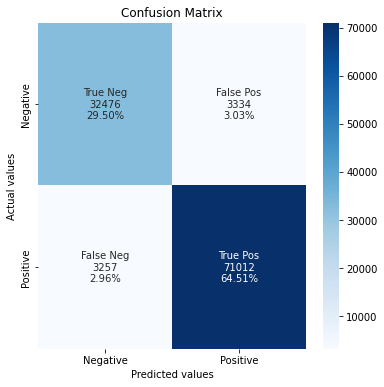

In [ ]:
#defining the DT model
dt_model=DecisionTreeClassifier()

#fitting the model
dt_model.fit(X_train_tfidf,y_train)

#evaluating on test data
model_Evaluate(dt_model,X_test_tfidf,y_test)

In [ ]:
#test prediction
test_pred_dt=dt_model.predict(X_test_tfidf)

#train prediction
train_pred_dt=dt_model.predict(X_train_tfidf)

#printing metrics
print('For best decision tree model','\nThe test accuracy:',accuracy_score(y_test,test_pred_dt),'\ntrain accuracy:',accuracy_score(y_train,train_pred_dt),'\nprecision score:',precision_score(y_test,test_pred_dt),'\nrecall score:',recall_score(y_test,test_pred_dt),'\nf1 score:',f1_score(y_test,test_pred_dt))

The test accuracy: 0.9401248194478511 
train accuracy: 0.9996729591744036 
precision score: 0.9551556237053775 
recall score: 0.9561459020587324 
f1 score: 0.9556505063418901


**The decision tree model gives an accuracy of 94% on test data.**

####6) Random forest model

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     35810
           1       0.97      0.97      0.97     74269

    accuracy                           0.96    110079
   macro avg       0.95      0.95      0.95    110079
weighted avg       0.96      0.96      0.96    110079



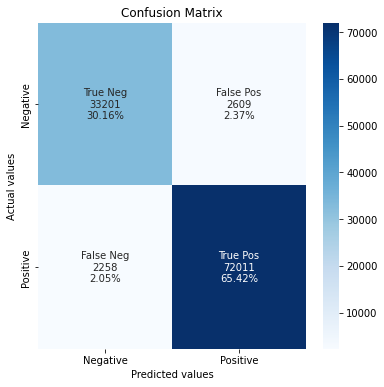

In [ ]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train_tfidf,y_train)
model_Evaluate(rf_model,X_test_tfidf,y_test)

In [ ]:
#test prediction
test_pred_rf=rf_model.predict(X_test_tfidf)

#train prediction
train_pred_rf=rf_model.predict(X_train_tfidf)

#printing metrics
print('For random forest model','\nThe test accuracy:',accuracy_score(y_test,test_pred_dt),'\ntrain accuracy:',accuracy_score(y_train,train_pred_dt),'\nprecision score:',precision_score(y_test,test_pred_dt),'\nrecall score:',recall_score(y_test,test_pred_dt),'\nf1 score:',f1_score(y_test,test_pred_dt))

For best random forest model 
The test accuracy: 0.9401248194478511 
train accuracy: 0.9996729591744036 
precision score: 0.9551556237053775 
recall score: 0.9561459020587324 
f1 score: 0.9556505063418901


**The random forest model gives an accuracy of 94% on test data.**

####7) XGBoost model

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     35810
           1       0.97      0.94      0.96     74269

    accuracy                           0.94    110079
   macro avg       0.93      0.94      0.94    110079
weighted avg       0.94      0.94      0.94    110079



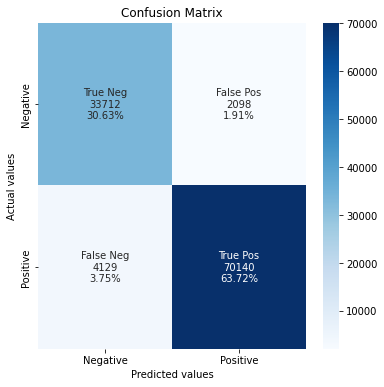

In [ ]:
#initialise the model
xgb=XGBClassifier(n_estimators=90, learning_rate=1.0, max_depth=4, random_state=1)

#fit on train data
xgb.fit(X_train_tfidf,y_train)

#evaluate on test
model_Evaluate(xgb,X_test_tfidf,y_test)

In [ ]:
#predicting on test
test_pred_xgb=xgb.predict(X_test_tfidf)

#predicting on train
train_pred_xgb=xgb.predict(X_train_tfidf)

#printing the metrics
print('For XGBoost model','\nThe test accuracy:',accuracy_score(y_test,test_pred_xgb),'\ntrain accuracy:',accuracy_score(y_train,train_pred_xgb),'\nprecision score:',precision_score(y_test,test_pred_xgb),'\nrecall score:',recall_score(y_test,test_pred_xgb),'\nf1 score:',f1_score(y_test,test_pred_xgb))

For XGBoost model 
The test accuracy: 0.9434315355335714 
train accuracy: 0.9449776522102509 
precision score: 0.9709571139843296 
recall score: 0.9444047987720314 
f1 score: 0.9574969114103763


**The XGBoost model gives an accuracy of 94.3% on test data.**

##3. B) Deep learning model

**Pls note: the below DL part of the code takes several hours to run.**

###i) Splitting the generic tweets into training data (60%), validation data (20%) and test data (20%).

In [ ]:
df2.head()

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeder crown...,1
1,7.680980e+17,mianusmanjaved congratulation pakistan becomin...,1
2,7.680980e+17,pepalerts september yesmag taking maine mendoz...,1
3,7.680980e+17,davidgaibis newly painted wall thanks million ...,1
4,7.680980e+17,cedricfeschotte excited announce july feschott...,1


In [ ]:
X=df2.text
y=df2.label

#Splitting train as 60%
X_train, X_rem, Y_train, Y_rem = train_test_split(X,y, train_size=0.6)

#From the remaining 40%, split train and test 50-50
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

###ii and iii) Defining and training a deep learning model to perform the sentiment classification task; tuning two hyperparameters of the deep learning model using grid search. 



**The model's architecture can be explained as follows:**

**a) We develop a Multilayer Perceptron (MLP) model to classify the tweets. The model is a simple feedforward network with fully connected layers.**

**b) The model has an input layer that equals the number of words in the vocabulary.**

**c) A single hidden layer with neurons and a rectified linear activation function is used. The number of neurons will be tuned for this layer .The output layer is a single neuron with a sigmoid activation function for predicting 0 for negative and 1 for positive reviews.**

**d) The network will be trained using the efficient Adam implementation of gradient descent and the binary cross entropy loss function, suited to binary classification problems. The learning rate of Adam optimizer will also be tuned. A track of validation accuracy will be kept when training and evaluating the model.**

**e) The model is fit on the training data in 30 epochs as the dataset is too large and higher number of epochs will be very computationally expensive.**

**f) After finding the optimal hyperparameters, the best model's accuracy is evaluated on the test data.**

The model can be defined and can be built from scratch using keras as shown below:

In [ ]:
#instantiating keras's tokenizer
tokenizer=Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

#Converting to BOW data using keras tokenizer
tokenized_train = tokenizer.texts_to_matrix(X_train, mode='count')
tokenized_val=tokenizer.texts_to_matrix(X_valid, mode='count')
tokenized_test=tokenizer.texts_to_matrix(X_test, mode='count')

#checking the work index and finding vocab of dataset
wordidx=tokenizer.word_index
V=len(wordidx)

#Building the model
n_words=tokenized_test.shape[1]
model1 = Sequential()
model1.add(Dense(units=100,input_shape=(n_words,),activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

#compiling the model
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

#Fitting the best model on train data and checking validation accuracy at each epoch
keras_model=model1.fit(tokenized_train,Y_train, batch_size=50,validation_data=(tokenized_val,Y_valid),epochs=10)

#evaluating the best model on validation data
h_eval_dict = model1.evaluate(tokenized_test, Y_test, return_dict=True)
h_eval_dict

Epoch 1/10
6605/6605 [==============================] - 33s 5ms/step - loss: 0.2393 - accuracy: 0.9009 - val_loss: 0.1544 - val_accuracy: 0.9378
Epoch 2/10
6605/6605 [==============================] - 29s 4ms/step - loss: 0.1516 - accuracy: 0.9401 - val_loss: 0.1505 - val_accuracy: 0.9393
Epoch 3/10
6605/6605 [==============================] - 28s 4ms/step - loss: 0.1493 - accuracy: 0.9407 - val_loss: 0.1505 - val_accuracy: 0.9388
Epoch 4/10
6605/6605 [==============================] - 26s 4ms/step - loss: 0.1480 - accuracy: 0.9413 - val_loss: 0.1489 - val_accuracy: 0.9395
Epoch 5/10
6605/6605 [==============================] - 25s 4ms/step - loss: 0.1466 - accuracy: 0.9415 - val_loss: 0.1479 - val_accuracy: 0.9397
Epoch 6/10
6605/6605 [==============================] - 24s 4ms/step - loss: 0.1451 - accuracy: 0.9421 - val_loss: 0.1472 - val_accuracy: 0.9398
Epoch 7/10
6605/6605 [==============================] - 29s 4ms/step - loss: 0.1436 - accuracy: 0.9423 - val_loss: 0.1464 - val_ac

{'accuracy': 0.9421597123146057, 'loss': 0.1466369926929474}

However, the disadvantages of this approach are:

1) It is time consuming and consumes a lot of RAM.

2) The keras tokenizer is only able to tokenize the data upto a maximum of 1000 features and crashes the RAM when the maximum number of features is set to 5000.

3) The validation accuracy obtained is low.

Hence, we use sklearn.neural_network's MLPClassifier to tune two hyperparameters. The model's architecture will be the same as the one built in keras above. The library is straightforward and is much less time consuming and was found to give higher validation accuracies.

Inside the MLP classifier, we use the following hyperparameters;

-hidden_layer_sizes(to be tuned): specifies the number of neurons and the number of hidden layers

-learning_rate_init(to be tuned)-  controls the step-size in updating the weights when optimizer='adam'.

-activation='relu'; the is the activation function used in the hidden layer

-max_iter= 30; this is the number of epochs used for training each model. We set it as 30 to keep the computation time manageable.



**The input for the MLPClassifier will be BOW data for which CountVectorizer will be used. The max_features are set to 5000 here. It converts a collection of text documents to a vector of term/token counts.Each value indicates the count of a particular word in the tweet. Similarly validation and test sets are also converted**

In [ ]:
#Creating bag of words data 
cv=CountVectorizer(max_features=5000)
BOW_train=cv.fit_transform(X_train)
BOW_valid  = cv.transform(X_valid)
BOW_test  = cv.transform(X_test)

In [ ]:
acc=0
#Tuning the number of neurons:
for neurons in [32,64,100]:
  #Tuning the learning rate for Adam optimizer:
  for alpha in [1e-2,1e-4,1e-6]:

    #Fitting the deep learning model with adam optimizer, one hidden layer with relu activation function and an output sigmoid layer
    DLmodel=MLPClassifier(hidden_layer_sizes=(neurons,), learning_rate_init=alpha,activation='relu',batch_size='auto', max_iter=30, random_state=1)
    
    #Fitting the model on train data
    DLmodel.fit(BOW_train,Y_train)

    #Checking validation accuracy for each set of hyperparameters
    DL_pred=DLmodel.predict(BOW_valid)

    #Getting the best hyperparameters
    if accuracy_score(Y_valid,DL_pred) > acc:
      acc=accuracy_score(Y_valid,DL_pred)
      best_alpha=alpha
      best_neurons=neurons

    #print the performance of each model
    print('For learning rate=',alpha,'and number of neurons in hidden layer=',neurons,'the validation accuracy is',accuracy_score(Y_valid,DL_pred))

#print the best hyperaparameters and corresponding validation accuracy
print('The best DL model uses learning rate=',best_alpha,'number of neurons in hidden layer=',best_neurons,'and has a validation accuracy of',acc)

For learning rate= 0.01 and number of neurons in hidden layer= 32 the validation accuracy is 0.9591017278656953
For learning rate= 0.0001 and number of neurons in hidden layer= 32 the validation accuracy is 0.9660150075401079
For learning rate= 1e-06 and number of neurons in hidden layer= 32 the validation accuracy is 0.7855884009520522
For learning rate= 0.01 and number of neurons in hidden layer= 64 the validation accuracy is 0.9599738367339523
For learning rate= 0.0001 and number of neurons in hidden layer= 64 the validation accuracy is 0.9663329638983267
For learning rate= 1e-06 and number of neurons in hidden layer= 64 the validation accuracy is 0.8774323661403732
For learning rate= 0.01 and number of neurons in hidden layer= 100 the validation accuracy is 0.9602100328857719
For learning rate= 0.0001 and number of neurons in hidden layer= 100 the validation accuracy is 0.9680771816348408
For learning rate= 1e-06 and number of neurons in hidden layer= 100 the validation accuracy is

Hence the best DL model has a validation accuracy of 96.8% and uses 100 neurons in the hidden layer with learning rate of 0.0001 in the adam optimizer.

###iv) Evaluating the best model on the test data in generic tweets dataset to obtain an accuracy value. 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     35690
           1       0.98      0.98      0.98     74389

    accuracy                           0.97    110079
   macro avg       0.96      0.96      0.96    110079
weighted avg       0.97      0.97      0.97    110079



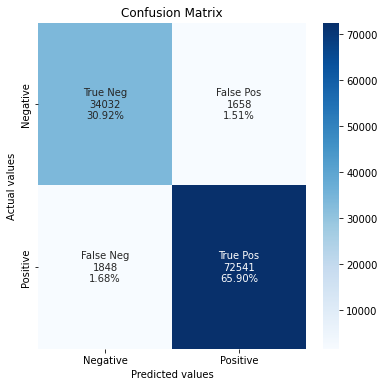

In [ ]:
#Fitting the best DL model on train data
best_DLmodel=MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=0.0001,activation='relu',batch_size='auto', max_iter=30, random_state=1)
best_DLmodel.fit(BOW_train,Y_train)

#Evaluating the best model on test data
model_Evaluate(best_DLmodel,BOW_test,Y_test)

**The model has performed well in terms of false negative and false positive rates at just around 1.5%.**

In [ ]:
#predicting on test
test_pred_DL=best_DLmodel.predict(BOW_test)

#predicting probability on test
test_prob_DL=best_DLmodel.predict_proba(BOW_test)

#predicting on train
train_pred_DL=best_DLmodel.predict(BOW_train)

#calculating and printing the metrics
print('For best Deep learning model','\nThe test accuracy:',accuracy_score(Y_test,test_pred_DL),'\ntrain accuracy:',accuracy_score(Y_train,train_pred_DL),'\nprecision score:',precision_score(Y_test,test_pred_DL),'\nrecall score:',recall_score(Y_test,test_pred_DL),'\nf1 score:',f1_score(Y_test,test_pred_DL))
print('AUC score is',roc_auc_score(Y_test,test_prob_DL[:,1]))

For best Deep learning model 
The test accuracy: 0.9667784046003325 
train accuracy: 0.9727799075806852 
precision score: 0.976271277741866 
recall score: 0.9745258035462232 
f1 score: 0.9753977597631941
AUC score is 0.9934741164596048


**The test accuracy is 96.7%**

##3.C)


###i) Evaluating the trained model with the best performance (considering all models from part a) and part b)) on the Canadian Elections data.:

 | MODELS|TEST ACCURACY| TRAIN ACCURACY| TEST PRECISION|TEST RECALL | TEST F1|
 |-------|-------------|---------------|---------------|------------|--------|
 |LOGISTIC REGRESSION|96.8%|97%|0.97|0.97|0.98|
 |KNN CLASSIFIER|81%|87%|0.92|0.79|0.85|
 |NAIVE BAYES|93%|93%|0.92|0.98|0.95|
 |SVM|96.7%|97%|0.98|0.97|0.98|
 |DECISION TREE|94%|99%|0.96|0.96|0.96|
 |RANDOM FOREST|94%|99%|0.96|0.96|0.96|
 |XGBOOST|94.3%|94%|0.97|0.95|0.96|
 |DEEP LEARNING MODEL|96.7%|97.3%|0.98|0.97|0.98|

**The best model is Logistic regression model as it has the best test accuracy of 96.8%. SVM and deep learning models are close in performance with logistic model but logistic has slightly higher accuracy.**

In [ ]:
#applying tf-idf on elections data
elections_tfidf  = vectoriser.transform(df1.text)

#mapping the sentiment for fitting the model
df1['sentiment']=df1['sentiment'].map({'negative':0,'positive':1})

Getting the logistic model from above and applying it on elections data:

In [ ]:
#predicting on test
test_pred_log=logistic_model.predict(elections_tfidf)

#predicting probability on test
test_prob_log=logistic_model.predict_proba(elections_tfidf)

#predicting on train
train_pred_log=logistic_model.predict(X_train_tfidf)

#predicting probability on train
train_prob_log=logistic_model.predict_proba(X_train_tfidf)

#calculating and printing the metrics
print('For best Logistic model','\nThe test accuracy:',accuracy_score(df1.sentiment,test_pred_log),',train accuracy:',accuracy_score(y_train,train_pred_log),\
      '\n\ntest precision:',precision_score(df1.sentiment,test_pred_log),',train precision:',precision_score(y_train,train_pred_log),\
      '\n\ntest recall:',recall_score(df1.sentiment,test_pred_log),',train recall:',recall_score(y_train,train_pred_log),\
      '\n\ntest AUC:',roc_auc_score(df1.sentiment,test_prob_log[:,1]),',train AUC:',roc_auc_score(y_train,train_prob_log[:,1]))

For best Logistic model 
The test accuracy: 0.7235528942115769 ,train accuracy: 0.9705254455931249 

test precision: 0.9043062200956937 ,train precision: 0.9787466380861863 

test recall: 0.6146341463414634 ,train recall: 0.9775407981903377 

test AUC: 0.867452364446125 ,train AUC: 0.9945739583136401


              precision    recall  f1-score   support

           0       0.59      0.90      0.71       387
           1       0.90      0.61      0.73       615

    accuracy                           0.72      1002
   macro avg       0.75      0.76      0.72      1002
weighted avg       0.78      0.72      0.73      1002



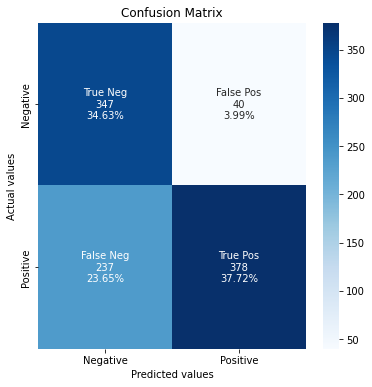

In [ ]:
#evaluating the best logistic model obtained from above on the elections data
X_test_tfidf=elections_tfidf
y_test=df1.sentiment
model_Evaluate(logistic_model,X_test_tfidf,y_test)

###ii) Explaining how well the predictions match the sentiment labelled in the Canadian elections data:

The best model is overfitting as there is significant difference between train(97%) and test(72%) accuracies. The test recall is also low at 0.61 as compared to train recall(0.98). AUC is slightly better at 0.87. The number of false negatives are very high as seen in the confusion matrix implying that the model is having a hard time classifying positive tweets.

##3.D) Proposing two other evaluation metrics that could be used to evaluate the models. 

**Precision and recall will be very helpful in evaluating the model.**

Precision is helpful in instances where we are concerned with how exact the model's predictions are. It informs us of the number of labels that are actually labeled as positive in correspondence to the instances that the classifier labeled as positive. A higher precision means less false positives.

Recall(Sensitivity) measures how well the model can recall the positive class (i.e. the number of positive labels that the model identified as positive). The higher the false negatives, the lower the recall.

In our case, precision and recall are very important as the government would like to know what percent of people really support them and don't support them.Precision and recall are extremely important in NLP in banks too. For example: while automating a loan processing workflow, NLP is used to speed up the identification of fraudulent applications.The lack of Precision will imply labor costs and less ROI. Also, banks don't accept to miss a single fraudulent application, which means that the solution will have to offer close to 100% recall.




##3.E) 

 

###i) Choosing the model that has the best performance and visualizing the sentiment prediction results and the true sentiment for each of the 4 parties:

In [ ]:
#adding a new column of predicted sentiments in the elections data
pred_sentiment = ["negative" if x==0 else "positive" for x in test_pred_log]
df1["predicted_sentiment"] = pred_sentiment
df1.head()

,text,sentiment,negative_reason,party,politician,tokenized text,predicted_sentiment
0,canadian election power grab pm trudeau yes ta...,0,calling election early,Liberal,Trudeau,"[canadian, election, power, grab, pm, trudeau,...",negative
1,hope trudeau loses canadian election tomorrow ...,0,covid,Liberal,Trudeau,"[hope, trudeau, loses, canadian, election, tom...",negative
2,dear canadian election test progressive whethe...,1,NaN,None,None,"[dear, canadian, election, test, progressive, ...",negative
3,canadian friend never forget trudeau year mand...,0,calling election early,Liberal,Trudeau,"[canadian, friend, never, forget, trudeau, yea...",negative
4,sorry thejagmeetsingh voted ndp life election ...,1,NaN,Mixed,Bernier,"[sorry, thejagmeetsingh, voted, ndp, life, ele...",negative


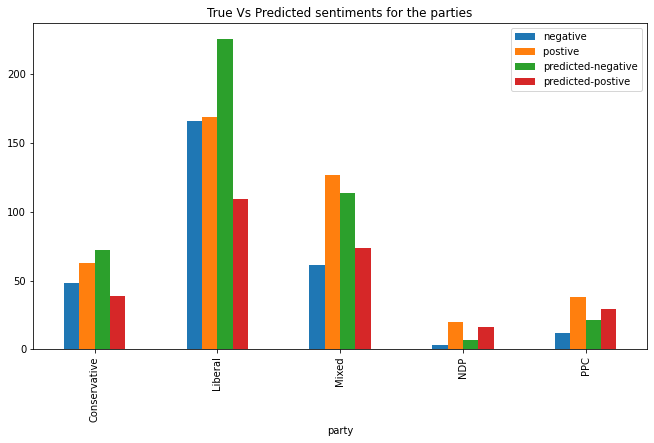

In [ ]:
#making a df for predicted sentiments
df_pred = df1[df1['party']!='None'].groupby(['predicted_sentiment','party']).size().reset_index().pivot(columns='predicted_sentiment', index='party', values=0)

#making a df for actual sentiments
df_actual = df1[df1['party']!='None'].groupby(['sentiment','party']).size().reset_index().pivot(columns='sentiment', index='party', values=0)

#concatenating predicted and actual
df_combined = pd.concat([df_actual,df_pred],axis=1)

#renaming the columns
df_combined.columns = ["negative","postive ","predicted-negative","predicted-postive"]

#plotting predicted and actual negative and positive sentiments respectively for each party and also for the mixed tweets
df_combined.plot(kind="bar",figsize=(11,6),title='True Vs Predicted sentiments for the parties')

###ii) Discussing findings from the model and whether NLP analytics based on tweets is useful for political parties during election campaigns. Also, explaining how each party is viewed in the public eye based on the sentiment value.

**i) Summary of findings from the model**:

Accuracy:72%, Precision: 90%, Recall: 61% and AUC:0.87

% of False negatives=23%, %of false positives=4%

Train metrics:

Accuracy:97%, Precision: 98%, Recall: 98% and AUC:0.99

Model is performing very well on train data and learns pretty well. However, when coming to test data, the model doesn't perform that well as accuracy and recall are low and the model has a high number of false negatives. 

**ii) Summary of findings from true vs predicted sentiment for parties visualization:**

For Liberal party: As it is known, the party had won the election, so clearly had more supporters. However, the party has much higher predicted negatives when in reality, it has almost equal positive and negative tweets. However, as compared to other parties, liberal party has highest predicted positives.

For Conservative: The model has predicted higher negatives than positives and has missed out on half of its supporters by classifying them negative. In reality, the party has higher positives.

The only two parties that were predicted to have higher positive to negative ratio are NDP and PPC.

For mixed sentiments, most of the negatives were classified correctly but the model misses out half of the supporters in the mixed tweets.

**iii) How parties are viewed in the public eye:**

Most of the tweets are aimed at Liberal and conservative parties indicating that these parties are the most popular. After these two comes PPC whereas NDP has the lowest number of tweets.

Based on our model predictions, the 2 major parties-liberal and conservative have more haters than suporters.NDP and PPC have more supporters than haters.However, the supporters of the two major parties are much more than the supporters of NDP and PPC.

Based on the actual sentiment, the conservative party, NDP and PPC have a higher positive to negative tweets ratio indicating that they are positively viewed by the public. Liberal party has the worst positive to negative tweets ratio. As liberals were the ruling party that time, it was likely that they receive more negative sentimental tweets with people expressing their current agony and disappointment.



**iv)How NLP analytics can be useful for the parties:**   

While NLP analytics model can predict the sentiments of tweets with 70% accuracy, it is still hard to predict which party will win the election. This might be because a large proportion of tweets have mixed sentiment meaning they are supporting/ criticising more than one party. The party that the people writing mixed tweets end up voting is something our model cannot predict.

Another fact is that not every person that tweets goes to vote and not every person who voted tweets. Sometimes, even sentiment change over a short duration and the person who supported a party on twitter might end up voting another party during election which is very unpredictable.

However, NLP analytics can be useful in many other ways. One of the examples is shown below where the TF-IDF scores of the words in the predicted negative tweets of a part can help the party deduce which words/emotions can contribute very highly to the people going against the party.



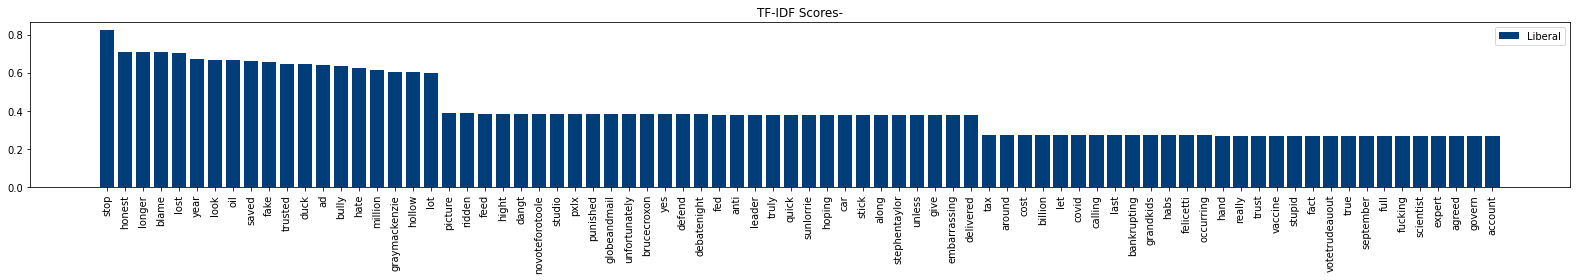

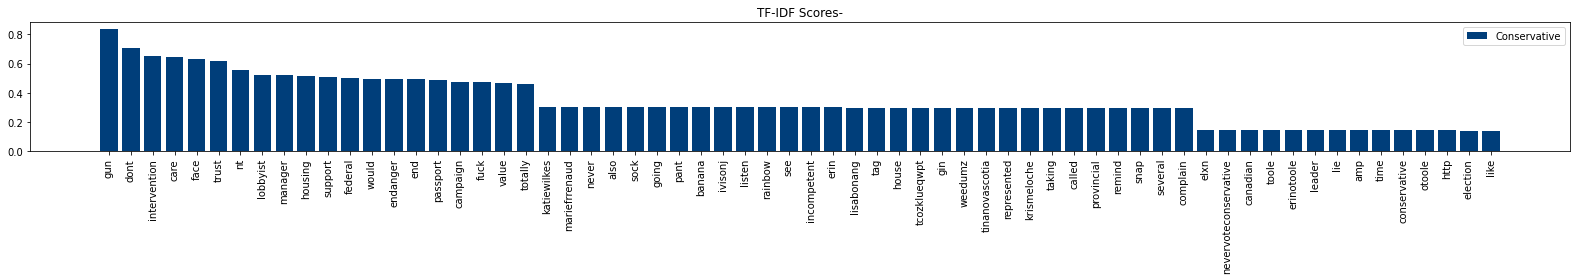

In [ ]:
def tfidf_scores_plots(DF,party):
  counter=CountVectorizer(max_features=5000)
  tfidf_transformer=TfidfTransformer()

  count_vector=counter.fit_transform(DF.text)
  tf_idf_vector=tfidf_transformer.fit_transform(count_vector)
  feature_names = counter.get_feature_names()

  # the lower the idf value, the more the words appear in every DataFrame.
  df=pd.DataFrame(columns = ['word', 'tfidf'])
  tfidf_df_list=[]
  for i in range(len(DF)):
    #get tfidf vector for first document
    first_document_vector=tf_idf_vector[i]

    #print the scores
    df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
    tfidf_df = df.sort_values(by=["tfidf"],ascending=False)
    tfidf_df = tfidf_df[0:50]
    # term frequency is weighted by IDF values by multiplying.
    tfidf_df = tfidf_df.reset_index()
    tfidf_df.columns = ['word', 'tfidf']
    tfidf_df_list.append(tfidf_df)
  df=pd.concat(tfidf_df_list)
  df=df.sort_values(by='tfidf',ascending=False)
  df.reset_index(inplace=True,drop=True)
  plt.figure(figsize=(22,4))
  plt.bar(df['word'].iloc[np.r_[0:20,200:230,1000:1030]], df['tfidf'].iloc[np.r_[0:20,200:230,1000:1030]], color='#003E7A',label=party)
  plt.title('TF-IDF Scores-')
  plt.xticks(rotation=90)
  plt.legend()
  plt.tight_layout()
  plt.show()
tfidf_scores_plots(df1[df1['party']=='Liberal'][df1['predicted_sentiment']=='negative'],'Liberal')
tfidf_scores_plots(df1[df1['party']=='Conservative'][df1['predicted_sentiment']=='negative'],'Conservative')

**From the TF–IDF analysis, we gain insight into words that are important in the negative tweets. For liberal party, the main factors were dishonesty, blaming attitude, fakeness, oil and trust issues. Some of the lesser important factors were covid, vaccine, bankrupting etc. For conservative party, the main causes are gun violence, trust issues, uncaring and lobbyist attitude.**



###iii) Suggesting one way to improve the accuracy of this model:

*WORD FREQUENCY ANALYSIS*

In this part, we check what class most frequent words belong to. 

In [ ]:
def word_freq_graphs(df,sentiment):

  #instantiating countvectorizer
  cv = CountVectorizer(max_features=5000)

  #getting the frequency of words in negative tweets
  neg_tweets = cv.fit_transform(df[df[sentiment]==0]['text']).toarray()
  df_neg = pd.DataFrame(data=neg_tweets,columns=cv.get_feature_names())

  #getting 50 most frequent negative tweets words
  top_df_neg=pd.DataFrame(df_neg.sum(axis=0).sort_values(ascending=False)[:50])
  top_df_neg.reset_index(inplace=True)
  top_df_neg.columns=['word','negative_frequency']

  #getting the frequency of words in positive tweets
  pos_tweets = cv.fit_transform(df[df[sentiment]==1]['text']).toarray()
  df_pos = pd.DataFrame(data=pos_tweets,columns=cv.get_feature_names())

  #getting 50 most frequent positive tweets words
  top_df_pos=pd.DataFrame(df_pos.sum(axis=0).sort_values(ascending=False)[:50])
  top_df_pos.reset_index(inplace=True)
  top_df_pos.columns=['word','positive_frequency']

  #combining the two df's to get the common words in both classes
  words_freq_combined=pd.merge(top_df_neg, top_df_pos, how='outer', on = 'word')
  words_freq_combined=words_freq_combined.fillna(0)

  #creating the word-frequency analysis plot
  plt.figure(figsize=(15,5))
  x=words_freq_combined['word'][:50]
  y1=words_freq_combined['negative_frequency'][:50]
  y2=words_freq_combined['positive_frequency'][:50]

  plt.bar(x,y1 , label='Negative sentiment')
  plt.bar(x,y2, bottom=y1, label='Positive sentiment')
  plt.xticks(rotation=90)
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.title('sentiments represented by 50 most frequent words')
  plt.legend()
  plt.show()

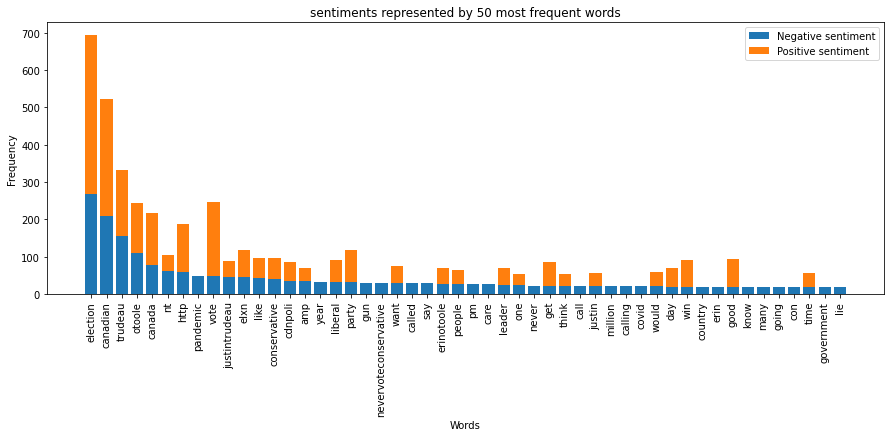

In [ ]:
word_freq_graphs(df1,'sentiment')

**Some of the most frequent words represent both positive and negative sentiments in elections data. This might affect the classification ability of model and reduce accuracy. In order to combat this, we should try to use more complex features such as n-grams and part of speech tags. Features as the combination of words provide better significance rather than considering single words as features. Combination of N words together are called N-grams. Bigrams are the most informative N-Gram combinations. Adding bigrams to feature set will improve the accuracy of text classification model. For example –it's better to train the model with the words'Never Vote Conservative' rather than just Conservative so that it is able to classify more precisely.**

**TF-IDF can be used for generating list with relevant words in sentences and later this can be utilized as input list for the N-Gram model to generate context among these words. Another solution would be to use stemming(process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words)  and an exhaustive stop words list to remove the irrelevant words that appear in both classes. For example- the words canada and canadian, call and called that appear in both classes should be stemmed and stop words like would, day, want should be removed.**

**In short, the best solution is to do better feature engineering.**


#PART 4: Negative Reason Classification

## Classification model implementation and tuning:




['calling election early' 'covid ' 'others' 'scandal' 'tell lies'
 'gun control' 'economy' 'healthcare and marijuana' 'segregation'
 'women reproductive right and racism' 'climate problem']


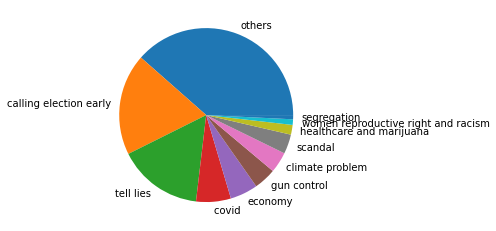

In [ ]:
#making pie plots to visualise the negative reasons
elections_negative=df1[df1["sentiment"]==0]
elections_negative['negative_reason'].value_counts().plot.pie()
plt.axis('off')
print(elections_negative['negative_reason'].unique())

**The most common reasons are calling election early and telling lies.**

In [ ]:
#encoding the negative reason classes
elections_negative['negative_reason']=elections_negative['negative_reason'].map({'calling election early':0,
                                                                                 'covid ':1, 
                                                                                 'others':2, 
                                                                                 'scandal':3,
                                                                                 'tell lies':4, 
                                                                                 'gun control':5, 
                                                                                 'economy':6, 
                                                                                 'healthcare and marijuana':7,
                                                                                 'segregation':8, 
                                                                                 'women reproductive right and racism':9,
                                                                                 'climate problem':10})

In [ ]:
elections_negative.head()

,text,sentiment,negative_reason,party,politician,tokenized text,predicted_sentiment
0,canadian election power grab pm trudeau yes ta...,0,0,Liberal,Trudeau,"[canadian, election, power, grab, pm, trudeau,...",negative
1,hope trudeau loses canadian election tomorrow ...,0,1,Liberal,Trudeau,"[hope, trudeau, loses, canadian, election, tom...",negative
3,canadian friend never forget trudeau year mand...,0,0,Liberal,Trudeau,"[canadian, friend, never, forget, trudeau, yea...",negative
5,vaccine amp gun key election otoole serious pl...,0,1,None,Otoole,"[vaccine, amp, gun, key, election, otoole, ser...",negative
6,sorry moderator respond leadership candidate d...,0,2,None,None,"[sorry, moderator, respond, leadership, candid...",negative


In [ ]:
#separating the df into features and target
X = elections_negative['text']
y = elections_negative['negative_reason']

#splitting into train(70%) and test(30%) as df's so that we can use the df's for visualizations later
df_train,df_test=train_test_split(elections_negative, test_size = 0.3, random_state = 11)

#getting xtrain,  ytrain, xtest and ytest
X_train=df_train.text
y_train=df_train.negative_reason
X_test=df_test.text
y_test=df_test.negative_reason

#initialising the TF-IDF vectorizer
tfidf = TfidfVectorizer()

#fitting tf-idf on train data
X_train_tfidf = tfidf.fit_transform(X_train)

#transforming test using tfidf
X_test_tfidf = tfidf.transform(X_test)

**We choose the logistic regression model as it was found to have the best performance in the previous part.**

In [ ]:
#Defining the model
logreg = LogisticRegression(random_state=1)

#Defining hyperparamters for tuning
grid={"C":[1,5,10,50], "solver":['newton-cg', 'lbfgs', 'saga'],'penalty':['l1','l2','elasticnet'],'multi_class':['multinomial']}

#grid seach for best hyperparameters
logreg_tuned = GridSearchCV(logreg,grid,cv=5)
logreg_tuned.fit(X_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid={'C': [1, 5, 10, 50], 'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'saga']})

In [ ]:
print("tuned hyperparameters :(best parameters) ",logreg_tuned.best_params_)
print("accuracy :",logreg_tuned.best_score_)

tuned hyperparameters :(best parameters)  {'C': 50, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.5444444444444445


In [ ]:
#Fitting the best model on train after tuning
best_model = LogisticRegression(random_state=1, C=50, solver='saga',penalty='l1')
best_model.fit(X_train_tfidf, y_train)

#getting the test prediction
y_pred = best_model.predict(X_test_tfidf)

#printing classification metrics
print(classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10]))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        20
           1       0.25      0.25      0.25         4
           2       0.56      0.73      0.63        51
           3       0.00      0.00      0.00         1
           4       0.36      0.25      0.29        20
           5       0.50      0.29      0.36         7
           6       1.00      0.50      0.67         6
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       1.00      0.50      0.67         4

    accuracy                           0.56       117
   macro avg       0.48      0.34      0.38       117
weighted avg       0.56      0.56      0.54       117



**From the classification report, it can be seen that some classes like 3,8,9 have 0 precision, recall and accuracy of the model is also poor. These classes are also one of the most under represented classes in the data.**

In [ ]:
#predicting on test
test_pred_log=best_model.predict(X_test_tfidf)

#predicting probability on test
test_prob_log=best_model.predict_proba(X_test_tfidf)

#predicting on train
train_pred_log=best_model.predict(X_train_tfidf)

#predicting probability on train
train_prob_log=best_model.predict_proba(X_train_tfidf)

#calculating and printing the metrics
print('For best Logistic model','\nThe test accuracy:',accuracy_score(y_test,test_pred_log),',train accuracy:',accuracy_score(y_train,train_pred_log),\
      '\n\ntest AUC:',roc_auc_score(y_test,test_prob_log,multi_class='ovr'),',train AUC:',roc_auc_score(y_train,train_prob_log,multi_class='ovr'))

For best Logistic model 
The test accuracy: 0.5555555555555556 ,train accuracy: 1.0 

test AUC: 0.6691000195328489 ,train AUC: 1.0


**The logistic regression model has an accuracy of 55% for negative reason classification on test data while the train accuracy is 100% indicating high overfitting.**

## 4.A) Providing a few reasons why our model may fail to predict the correct negative reasons and backing up reasoning with examples from the test sets. 

**REASON 1: Some of the classes like classes 5,7,8,9 are under represented in train data as shown below. The imbalanced classes reduce the accuracy of the model. The classes 3,8 and 9 have just 1 value in test data which was wrongly predicted resulting in 0 precision/recall for these classes** 

In [ ]:
print(y_train.value_counts())

2     98
0     53
4     41
1     21
6     14
3     13
10    11
5      9
7      5
9      3
8      2
Name: negative_reason, dtype: int64


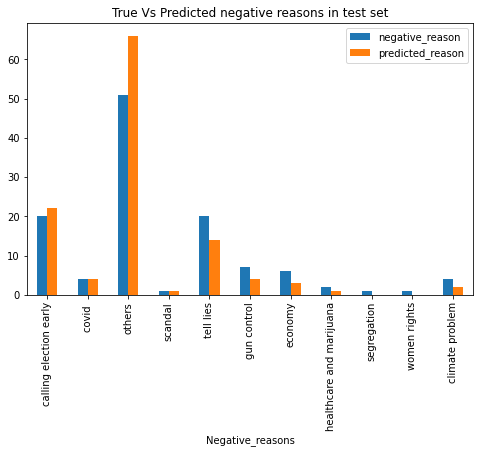

In [ ]:
#creating a predicted reason column in test df
df_test['predicted_reason']=test_pred_log

pred_list=[]
actual_list=[]
x=[]
for i in range(11):
  pred_list.append(len(df_test[df_test['predicted_reason']==i]))
  actual_list.append(len(df_test[df_test['negative_reason']==i]))
Negative_reasons=['calling election early', 'covid ', 'others', 'scandal', 'tell lies','gun control', 'economy', 'healthcare and marijuana', 'segregation','women rights', 'climate problem']

#Visualizing the true and predicted negative reasons in test data
neg_reason_df=pd.DataFrame({'Negative_reasons':Negative_reasons,'negative_reason':actual_list,'predicted_reason':pred_list})
neg_reason_df.set_index('Negative_reasons',inplace=True)
neg_reason_df.plot(kind="bar",figsize=(8,5),title='True Vs Predicted negative reasons in test set')

As we can see from above, scandal, segregation and women right have negligible data in test set. Hence, they cannot be classified accurately.

**REASON 2: The model is too complex or has too many features(1000s of features in tfidf vector) as compared to the total number of samples in train data. Also, many features which are highly frequent and have high tfidf scores are not relevant and just act as noise in the data(as per word frequency and tfidf graphs below).**

**REASON 3: The model has very high variance which indicates the estimate of the target function will alter substantially if different training data are used. The model is so accurate that it is perfectly fitted to the train dataset but fails to generalize to future datasets.**

**REASON 4: There are many features which corresponding to two or more classes(i.e., negative reasons) which is why the model might be failing to recongnise the actual class.We can check the top words and their classes and make graphs to support the reason for poor classification.**

**WORD FREQUENCY GRAPHS FOR DIFFERENT NEGATIVE REASONS IN TEST SET:**

In [ ]:
def word_freq_graphs(df):
  
  #Instantiating the vectorizer
  vectorizer=CountVectorizer(max_features=5000)

  #getting the frequency of words in the tweets having negative reason as calling election early
  calling_election_early_tweets = vectorizer.fit_transform(df[df["negative_reason"]==0]['text']).toarray()
  df_calling_election_early = pd.DataFrame(data=calling_election_early_tweets,columns=vectorizer.get_feature_names())

  #getting the 80 most frequent words in this reason
  top_calling_election_early_wordsdf=pd.DataFrame(df_calling_election_early.sum(axis=0).sort_values(ascending=False)[:80])
  top_calling_election_early_wordsdf.reset_index(inplace=True)
  top_calling_election_early_wordsdf.columns=['word','calling_election_early_frequency']

  vectorizer=CountVectorizer(max_features=5000)

  #getting the frequency of words in the tweets having negative reason as telling lies
  tell_lies_tweets = vectorizer.fit_transform( df[df["negative_reason"]==4]['text']).toarray()
  df_tell_lies = pd.DataFrame(data=tell_lies_tweets,columns=vectorizer.get_feature_names())

  #getting the 80 most frequent words in this reason
  top_tell_lies_wordsdf=pd.DataFrame(df_tell_lies.sum(axis=0).sort_values(ascending=False)[:80])
  top_tell_lies_wordsdf.reset_index(inplace=True)
  top_tell_lies_wordsdf.columns=['word','tell_lies_frequency']

  vectorizer=CountVectorizer(max_features=5000)

  #getting the frequency of words in the tweets having negative reason as others
  others_tweets = vectorizer.fit_transform( df[df["negative_reason"]==2]['text']).toarray()
  df_others = pd.DataFrame(data=others_tweets,columns=vectorizer.get_feature_names())

  #getting the 80 most frequent words in this reason
  top_others_wordsdf=pd.DataFrame(df_others.sum(axis=0).sort_values(ascending=False)[:80])
  top_others_wordsdf.reset_index(inplace=True)
  top_others_wordsdf.columns=['word','others_frequency']

  vectorizer=CountVectorizer(max_features=5000)

  #getting the frequency of words in the tweets having negative reason as covid
  covid_tweets = vectorizer.fit_transform( df[df["negative_reason"]==1]['text']).toarray()
  df_covid = pd.DataFrame(data=covid_tweets,columns=vectorizer.get_feature_names())

  #getting the 80 most frequent words in this reason
  top_covid_wordsdf=pd.DataFrame(df_covid.sum(axis=0).sort_values(ascending=False)[:80])
  top_covid_wordsdf.reset_index(inplace=True)
  top_covid_wordsdf.columns=['word','covid_frequency']

  #combining the two df's to get the common words in both classes
  words_freq_combined=pd.merge(top_calling_election_early_wordsdf, top_tell_lies_wordsdf, how='outer', on = 'word')
  words_freq_combined2=pd.merge(words_freq_combined, top_others_wordsdf, how='outer', on = 'word')
  words_freq_combined3=pd.merge(words_freq_combined2, top_covid_wordsdf, how='outer', on = 'word')
  words_freq_combined3=words_freq_combined3.fillna(0)

  #creating the word-frequency analysis plot
  plt.figure(figsize=(19,6))
  x=words_freq_combined3['word'][:80]
  y1=words_freq_combined3['calling_election_early_frequency'][:80]
  y2=words_freq_combined3['tell_lies_frequency'][:80]
  y3=words_freq_combined3['others_frequency'][:80]
  y4=words_freq_combined3['covid_frequency'][:80]

  plt.bar(x,y1 , label='calling_election_early_frequency')
  plt.bar(x,y2, bottom=y1, label='tell_lies_frequency')
  plt.bar(x,y3, bottom=y1+y2, label='others_frequency')
  plt.bar(x,y4, bottom=y1+y2+y3, label='covid_frequency')
  plt.xticks(rotation=90)
  plt.xlabel('Words')
  plt.ylabel('Frequency of words')
  plt.title('Classes represented by 80 most frequent words')
  plt.legend()
  plt.show()

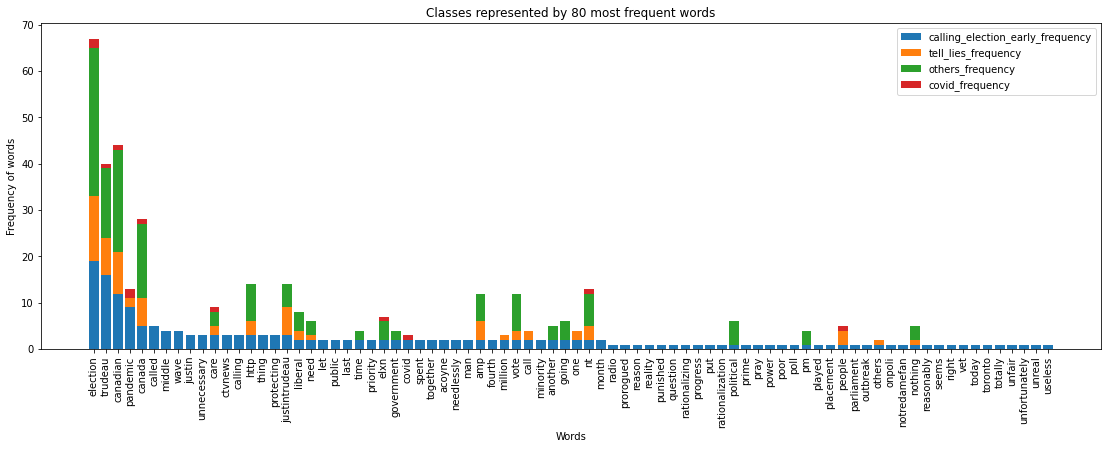

In [ ]:
word_freq_graphs(df_test)

**The above graph shows that some of the most frequent words in the test set like election, trudeau, canadian,pandemic, canada belong to more than one class reducing the ability of the model to differentiate between the classes.**

**GRAPH SHOWING WORDS WITH HIGHEST TF-IDF SCORES IN THE TEST DATA:**

<Figure size 1368x432 with 0 Axes>

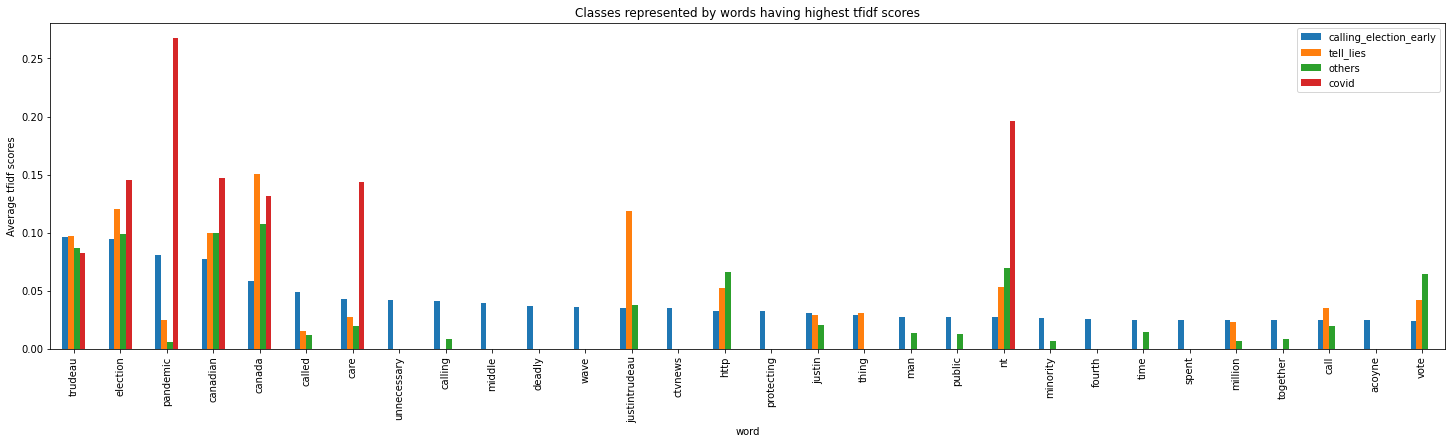

In [ ]:
def tfidf_graphs(df):

  vectorizer=TfidfVectorizer()

  calling_election_early_tweets = vectorizer.fit_transform(df[df["negative_reason"]==0]['text']).toarray()
  df_calling_election_early = pd.DataFrame(data=calling_election_early_tweets,columns=vectorizer.get_feature_names())

  top_calling_election_early_wordsdf=pd.DataFrame(df_calling_election_early.mean(axis=0).sort_values(ascending=False))
  top_calling_election_early_wordsdf.reset_index(inplace=True)
  top_calling_election_early_wordsdf.columns=['word','calling_election_early_frequency']

  tell_lies_tweets = vectorizer.transform( df[df["negative_reason"]==4]['text']).toarray()
  df_tell_lies = pd.DataFrame(data=tell_lies_tweets,columns=vectorizer.get_feature_names())

  top_tell_lies_wordsdf=pd.DataFrame(df_tell_lies.mean(axis=0).sort_values(ascending=False))
  top_tell_lies_wordsdf.reset_index(inplace=True)
  top_tell_lies_wordsdf.columns=['word','tell_lies_frequency']

  others_tweets = vectorizer.transform( df[df["negative_reason"]==2]['text']).toarray()
  df_others = pd.DataFrame(data=others_tweets,columns=vectorizer.get_feature_names())

  top_others_wordsdf=pd.DataFrame(df_others.mean(axis=0).sort_values(ascending=False))
  top_others_wordsdf.reset_index(inplace=True)
  top_others_wordsdf.columns=['word','others_frequency']

  covid_tweets = vectorizer.transform( df[df["negative_reason"]==1]['text']).toarray()
  df_covid = pd.DataFrame(data=covid_tweets,columns=vectorizer.get_feature_names())

  top_covid_wordsdf=pd.DataFrame(df_covid.mean(axis=0).sort_values(ascending=False))
  top_covid_wordsdf.reset_index(inplace=True)
  top_covid_wordsdf.columns=['word','covid_frequency']

  words_freq_combined=pd.merge(top_calling_election_early_wordsdf, top_tell_lies_wordsdf, how='inner', on = 'word')
  words_freq_combined2=pd.merge(words_freq_combined, top_others_wordsdf, how='inner', on = 'word')
  words_freq_combined3=pd.merge(words_freq_combined2, top_covid_wordsdf, how='inner', on = 'word')
  words_freq_combined3=words_freq_combined3.fillna(0)
  plt.figure(figsize=(19,6))
  x=words_freq_combined3['word'][:30]
  y1=words_freq_combined3['calling_election_early_frequency'][:30]
  y2=words_freq_combined3['tell_lies_frequency'][:30]
  y3=words_freq_combined3['others_frequency'][:30]
  y4=words_freq_combined3['covid_frequency'][:30]

  df_combined=pd.DataFrame({'word':x,'calling_election_early':y1,'tell_lies':y2,'others':y3,'covid':y4})
  df_combined.set_index('word',inplace=True)

  df_combined.plot(kind="bar",figsize=(25,6),ylabel='Average tfidf scores',title='Classes represented by words having highest tfidf scores')
tfidf_graphs(df_test)

**The above graph shows that many high tfidf scoring words belong to more than one class.The model treats these words with very high importance leading to incorrect classifications.**


##4.B) Suggesting one way to improve the accuracy of selected model.


The solution to Reason 1,2 and 3 from part 4.A could be collecting more samples from under represented classes like 3(scandal),5(gun control),6(economy),7(healthcare and marijuana),8(segregation),9(women reproductive right and racism),10(climate problem) or oversampling these classes. As the number of samples increase, variance will decrease and overfitting will reduce resulting in better model accuracy on test data. We can also combine similar negative reasons into fewer categories to increase the number of samples in each class. For example:-segregation, women reproductive right & racism and healthcare & marijuana can be grouped together into one class- Social because segregation, racism and women rights signify the same thing. Scandal,calling election early and telling lies can be grouped into one class- Scandal. This is because all three are morally or legally wrong resulting in public outrage.

We can even define features using word-frequency analysis as shown below, where we get the most frequent words in the negative tweets and only use them as input features for our model to remove noisy features and get better accuracy.






In [ ]:
#Instantiating the vectorizer
vectorizer=CountVectorizer()

#getting the frequency of words in the tweets 
tweets = vectorizer.fit_transform(elections_negative['text']).toarray()
df_words = pd.DataFrame(data=tweets,columns=vectorizer.get_feature_names())

#getting the most frequent words in this reason
top_wordsdf=pd.DataFrame(df_words.sum(axis=0).sort_values(ascending=False)[:500])
top_wordsdf

,0
election,269
canadian,208
trudeau,157
otoole,110
canada,77
...,...
detail,3
punish,3
ve,3
govern,3


In conclusion, the models can be improved by gathering more data, doing better feature engineering and by using more complex models such as neural networks and training on word embeddings/word2vec.